<a href="https://colab.research.google.com/github/i-am-Aryan-Raj/news-project/blob/main/Artizence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d deekoul/indian-language-summarization

 69% 28.0M/40.5M [00:00<00:00, 82.5MB/s]
100% 40.5M/40.5M [00:00<00:00, 96.0MB/s]


In [ ]:
import zipfile
zip_data = zipfile.ZipFile('/content/indian-language-summarization.zip')
zip_data.extractall('/content')
zip_data.close()

# **1. Sentiment Analysis**

###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
eng_df = pd.read_csv('/content/Eng_train.csv')
eng_df.head()

,id,Link,Heading,Summary,Article
0,3938f547c863630032649c54e611e6b0,https://www.indiatvnews.com/news/world/russia-...,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...
1,1b336d62e9502c5b91b7afd3c7bcff46,https://www.indiatvnews.com/news/world-author-...,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,082262f1c5a9e1112c39369403ff4e9a,https://www.indiatvnews.com/news/world/fumio-k...,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,82cce3b894007faf93e567d751dd2aef,https://www.indiatvnews.com/news/world/pakista...,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...
4,4b3bbf58136527fff41adc6c2f37d73d,https://www.indiatvnews.com/news/world/london-...,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...


In [ ]:
eng_df.isna().sum()

id         0
Link       0
Heading    0
Summary    0
Article    0
dtype: int64

In [ ]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       12565 non-null  object
 1   Link     12565 non-null  object
 2   Heading  12565 non-null  object
 3   Summary  12565 non-null  object
 4   Article  12565 non-null  object
dtypes: object(5)
memory usage: 490.9+ KB


In [ ]:
eng_df.columns

Index(['id', 'Link', 'Heading', 'Summary', 'Article'], dtype='object')

In [ ]:
eng_df.drop(['Link'], axis = 1, inplace = True)

In [ ]:
eng_df.head()

,id,Heading,Summary,Article
0,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...
1,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...
4,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...


In [ ]:
eng_df['Summary'][0]

'Since the invasion of Ukraine, the value of the Russian currency, the ruble, has plunged by more than a third to a record low.'

In [ ]:
eng_df['Article'][0]

'Logos for MasterCard and Visa credit cards at the entrance of a New York coffee shopIn the latest blow to Russia’s financial system after its invasion of Ukraine, Mastercard and Visa said they are suspending their operations in the country. Mastercard said cards issued by Russian banks will no longer be supported by its network and any Mastercard issued outside the country will not work at Russian stores or ATMs.“We don’t take this decision lightly,” Mastercard said in a statement, adding that it made the move after discussions with customers, partners and governments.Visa said it’s working with clients and partners in Russia to cease all Visa transactions over the coming days.“We are compelled to act following Russia’s unprovoked invasion of Ukraine, and the unacceptable events that we have witnessed,” Visa Chairman and Chief Executive Officer Al Kelly said in a statement.The twin suspensions were announced within 16 minutes of each other, and they followed a private video call earli

In [ ]:
example = eng_df['Heading'][0]
print(example)

Russia Ukraine War: Mastercard, Visa suspend operations in Russia after invasion


In [ ]:
tokens = nltk.word_tokenize(example)
tokens

['Russia',
 'Ukraine',
 'War',
 ':',
 'Mastercard',
 ',',
 'Visa',
 'suspend',
 'operations',
 'in',
 'Russia',
 'after',
 'invasion']

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tags = nltk.pos_tag(tokens)
tags

[('Russia', 'NNP'),
 ('Ukraine', 'NNP'),
 ('War', 'NNP'),
 (':', ':'),
 ('Mastercard', 'NNP'),
 (',', ','),
 ('Visa', 'NNP'),
 ('suspend', 'VBP'),
 ('operations', 'NNS'),
 ('in', 'IN'),
 ('Russia', 'NNP'),
 ('after', 'IN'),
 ('invasion', 'NN')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
!pip install svgling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.5 MB/s eta 0:00:00


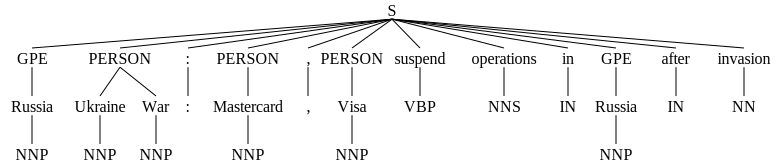

In [ ]:
entities = nltk.chunk.ne_chunk(tags)
entities

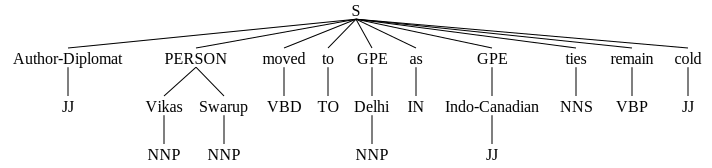

In [ ]:
ent = nltk.chunk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(eng_df['Heading'][1])))
ent

## Getting started

Using VADAR scoring

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [ ]:
sia

In [ ]:
sia.polarity_scores('I love my cat')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.7351}

In [ ]:
sia.polarity_scores(eng_df['Article'][0])

{'neg': 0.083, 'neu': 0.874, 'pos': 0.043, 'compound': -0.9601}

Calculating sentiment scores for entire dataset

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
results = {}
for i, row in tqdm(eng_df.iterrows(), total = len(eng_df)):
  articles = row['Article']
  results[row.name] = sia.polarity_scores(articles)
  # results[ids] = sia.polarity_scores(articles)

  0%|          | 0/12565 [00:00<?, ?it/s]

In [ ]:
first_five_items = list(results.items())[:5]
for i in first_five_items:
  print(i)

(0, {'neg': 0.083, 'neu': 0.874, 'pos': 0.043, 'compound': -0.9601})
(1, {'neg': 0.016, 'neu': 0.904, 'pos': 0.08, 'compound': 0.9472})
(2, {'neg': 0.043, 'neu': 0.863, 'pos': 0.093, 'compound': 0.9253})
(3, {'neg': 0.033, 'neu': 0.848, 'pos': 0.119, 'compound': 0.9759})
(4, {'neg': 0.225, 'neu': 0.723, 'pos': 0.052, 'compound': -0.9997})


In [ ]:
pd.DataFrame(results).T

,neg,neu,pos,compound
0,0.083,0.874,0.043,-0.9601
1,0.016,0.904,0.080,0.9472
2,0.043,0.863,0.093,0.9253
3,0.033,0.848,0.119,0.9759
4,0.225,0.723,0.052,-0.9997
...,...,...,...,...
12560,0.118,0.783,0.099,-0.9273
12561,0.089,0.852,0.059,-0.9688
12562,0.047,0.849,0.103,0.9918
12563,0.050,0.876,0.075,0.7901


In [ ]:
vaders = pd.DataFrame(results).T
vaders = vaders.merge(eng_df, how = 'right', left_index=True, right_index=True)

In [ ]:
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...


In [ ]:
count_neutral = vaders[(vaders['compound'] >= -0.8) & (vaders['compound'] <= 0.8)].shape[0]
count_neutral

2897

Putting 0.8 for neutral sentiment is reasonable, since news articles are largely neutral.

In [ ]:
threshold = 0.8
vaders['Sentiment'] = vaders['compound'].apply(lambda score: 'Positive' if score > threshold else ('Negative' if score < -threshold else 'Neutral'))
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...,Negative
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative


Final function for sentiment for custom news article

In [ ]:
def sentiment(article):
  threshold = 0.8
  statement = article
  statement = statement.split()
  if len(statement) < 20: threshold -= 0.2  # threshold = 0.6 if statement is small.

  sentiment_scores = sia.polarity_scores(article)
  compound_value = sentiment_scores['compound']

  if compound_value>threshold:
    return 'Positive'
  elif compound_value< -threshold:
    return 'Negetive'
  else: return 'Neutral'

A threshold value of 0.8 works well for news articles, since they are often neutral. However, it may not be very good for small statements.

# **2. Classification of Headlines**

In [ ]:
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...,Negative
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative


###Methodology:
Since the dataset is unlabelled, a model cannot be directly trained on it.

1. Deciding in what categories to categorise a given article.
2. Get some of the most frequently used keywords in each type of news article.
3. Stem the article and use cosine similarity to categorise the given news article

Since the dataset I am dealing with is unlabelled, I will get some most used words for the 5 pre- defined news categories.

In [ ]:
# Tech words list
tech_keywords = [
    "Technology", "Innovation", "Software", "Hardware", "Digital",
    "Internet", "Data", "Device", "App", "Platform", "Smartphone",
    "Computer", "AI", "Algorithm", "Coding", "Developer", "Startup",
    "Tech giant", "Cybersecurity", "Privacy", "Cloud", "Social media",
    "VR", "AR", "IoT", "Machine learning", "Automation", "Update",
    "Upgrade", "Interface", "Network", "Website", "Server", "Program",
    "Code", "API", "Encryption", "Vulnerability", "Software development",
    "Tech industry"
]

# Business words list
business_keywords = [
    "Business", "Company", "Market", "Economy", "Investment", "Stock",
    "Share", "Profit", "Revenue", "Growth", "CEO", "CFO", "Shareholder",
    "Merger", "Acquisition", "Competition", "Strategy", "Financial",
    "Management", "Entrepreneur", "Corporation", "Market share", "Brand",
    "Customer", "Consumer", "Product", "Service", "Sales", "Trade",
    "Partnership", "Deal", "Negotiation", "Investment", "Entrepreneurship",
    "Start-up", "Venture", "Bankruptcy", "Capital", "Budget", "Revenue"
]

# Politics words list
politics_keywords = [
    "Politics", "Government", "Election", "Policy", "President",
    "Congress", "Senate", "House", "Legislation", "Democracy",
    "Dictatorship", "Campaign", "Vote", "Debate", "Political party",
    "Opposition", "Prime Minister", "Parliament", "Constitution", "Law",
    "Policy", "Diplomacy", "International relations", "Foreign policy",
    "Security", "National", "Citizenship", "Immigration", "Human rights",
    "Justice", "Supreme Court", "Civil rights", "Constitution", "Lobbying",
    "Activism", "Governmental", "Bipartisan", "Legislation",
    "Political figure", "Public office"
]

# Entertainment words list
entertainment_keywords = [
    "Entertainment", "Film", "Movie", "Television", "Series", "Actor",
    "Actress", "Director", "Producer", "Script", "Plot", "Premiere",
    "Box office", "Audience", "Award", "Performance", "Celebrity",
    "Music", "Song", "Album", "Artist", "Band", "Concert", "Tour",
    "Musician", "Soundtrack", "Genre", "Production", "Casting",
    "Screenplay", "Adaptation", "Cinematography", "Editing",
    "Special effects", "Animation", "Character", "Plot twist",
    "Sequel", "Franchise", "Critic"
]

# Sports words list
sports_keywords = [
    "Team", "Game", "Player", "Match", "Win", "Loss", "Goal", "Score",
    "Victory", "Defeat", "Tournament", "Season", "Coach", "Performance",
    "Athlete", "Championship", "Record", "Play", "Injury", "Fitness",
    "Training", "Strategy", "Tactics", "Compete", "League", "Field",
    "Court", "Fans", "Spectators", "Crowd", "Stadium", "Ball", "Referee",
    "Offense", "Defense", "Title", "Medal", "Penalty", "Contract"
]

keywords = [sports_keywords, politics_keywords, business_keywords, tech_keywords, entertainment_keywords]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
tfvec = TfidfVectorizer(stop_words = 'english')

In [ ]:
# functionn for stemming the text'

ps = PorterStemmer()
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
sample_stem = vaders['Article'][4]
# tfidf_matrix = tf_vec.fit_transform(sample_stem)
x = stem_text(sample_stem)
x

'arm polic at the scene of an incid on london bridg in central london follow a polic incident.a man wear a fake explos vest stab sever peopl friday in london , kill two in what polic are treat as a terrorist attack befor be tackl by member of the public and then fatal shot by offic on london bridg . polic said the attack wa usman khan , a 28-year-old who wa releas on probat last year after serv six year for terror offens . metropolitan polic chief cressida dick said two stab victim had die and three injur peopl were be treat in hospit after the attack , which unfold just yard from the site of a deadli 2017 van and knife rampage.health offici said one of the injur wa in critic but stabl condit , one wa stabl and the third had less seriou injuries.polic said khan wa convict in 2012 of terror offens and releas in decemb 2018 “ on licens , ” which mean he had to meet certain condit or face recal to prison . sever british media outlet report that he wa wear an electron ankl bracelet.basu sa

In [ ]:
vaders['Combined news'] = vaders['Heading'] + ' ' + vaders['Summary'] + ' ' + vaders['Article']
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment,Combined tags,Combined news
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...,Negative,"russia ukrain war : mastercard , visa suspend ...","Russia Ukraine War: Mastercard, Visa suspend o..."
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive,author-diplomat vika swarup move to delhi as i...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive,japan ’ s ex-top diplomat fumio kishida to bec...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive,pakistan sikh urg india to facilit access to d...,Pakistan Sikhs urge India to facilitate access...
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative,london knife attack suspect wa jail for 6 year...,London knife attack suspect was jailed for 6 y...


In [ ]:
vaders['Combined tags'] = vaders['Combined news'].apply(stem_text)
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment,Combined tags,Combined news
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...,Negative,"russia ukrain war : mastercard , visa suspend ...","Russia Ukraine War: Mastercard, Visa suspend o..."
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive,author-diplomat vika swarup move to delhi as i...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive,japan ’ s ex-top diplomat fumio kishida to bec...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive,pakistan sikh urg india to facilit access to d...,Pakistan Sikhs urge India to facilitate access...
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative,london knife attack suspect wa jail for 6 year...,London knife attack suspect was jailed for 6 y...


In [ ]:
tfvec.fit_transform(vaders['Combined tags'])

<12565x73972 sparse matrix of type '<class 'numpy.float64'>'
	with 2356406 stored elements in Compressed Sparse Row format>

In [ ]:
# function to calculate cosine simiiarity
def similarity(article_vector, keyword_vector):
    return cosine_similarity(article_vector, keyword_vector)

Final function

In [ ]:
#function to classify a given article headline

def classify_article(text):
    text_vector = tfvec.transform([text])
    category_similarities = {}
    for category, keywords in zip(['Sports', 'Politics', 'Business', 'Tech', 'Entertainment'],
                                  [sports_keywords, politics_keywords, business_keywords, tech_keywords, entertainment_keywords]):
        keyword_vector = tfvec.transform(keywords)
        category_similarities[category] = similarity(text_vector, keyword_vector).sum()
    if all(score == 0 for score in category_similarities.values()):
        return 'Unsure'
    else:
        return max(category_similarities, key=category_similarities.get)

In [ ]:
vaders['Summary'][3]

'Pakistan Sikh Council (PSC) Patron-in-Chief Sardar Ramesh Singh Khalsa said the Kartarpur Corridor\'s opening on Saturday was in line with Sikhism founder Guru Nanak\'s teachings of inclusion, peace, and interfaith harmony and that he was speechless after seeing "tears of joy in the eyes of his Sikh brethren", Geo TV reported'

In [ ]:
classify_article(vaders['Article'][3])

'Politics'

# **3. Keyword Detection**

In [ ]:
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment,Combined tags,Combined news
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...,Negative,"russia ukrain war : mastercard , visa suspend ...","Russia Ukraine War: Mastercard, Visa suspend o..."
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive,author-diplomat vika swarup move to delhi as i...,Author-Diplomat Vikas Swarup moved to Delhi as...
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive,japan ’ s ex-top diplomat fumio kishida to bec...,Japan’s ex-top diplomat Fumio Kishida to becom...
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive,pakistan sikh urg india to facilit access to d...,Pakistan Sikhs urge India to facilitate access...
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative,london knife attack suspect wa jail for 6 year...,London knife attack suspect was jailed for 6 y...


In [ ]:
# for i in vectoriser.get_feature_names_out():
#   print(i)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
vectoriser = TfidfVectorizer(max_features = 5000, stop_words = 'english')
tfmatrix = vectoriser.fit_transform(vaders['Combined news'])

In [ ]:
tfmatrix

<12565x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1954549 stored elements in Compressed Sparse Row format>

### Final Function

In [ ]:
def extract_keywords(article, vectorizer = vectoriser, top_n=5):


    # Compute TF-IDF scores for the article
    tfidf_representation = vectorizer.transform([article])

    # Get feature names (words) and their corresponding TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_representation.toarray()[0]

    # Sort feature names based on TF-IDF scores
    sorted_indices = tfidf_scores.argsort()[::-1]

    # Extract top N keywords
    keywords = [(feature_names[idx].capitalize()) for idx in sorted_indices[:top_n]]

    return keywords


In [ ]:
a = 'Punjab’s Ranji Trophy skipper Mandeep Singh remembers a teenager who came along to challenge his dominance at the yo-yo test. That boy, Uday Saharan, not only showed impressive fitness but also caught the eye with his leadership skills.“You can see that attitude, that ‘boss, I am not here just to attend the camp, I want to be best at everything,’” Mandeep Singh tells The Indian Express. “Also, at a young age, Uday was challenging the seniors to do well. He is talented, that’s why he is playing for India U-19, but he had that extra spark in him. He is never satisfied with himself.”All those traits were visible on Tuesday against South Africa in the U-19 World Cup semi-final in Benoni. Uday walked out with the team reeling at 8 for 2 in the chase of 245. South Africa’s pace duo Kwena Maphaka and Tristan Luus were at their intimidating best. Soon, India was 32 for 4, but the Indian captain showed exemplary leadership quality by continuously talking to his partner Sachin Dhas. The duo put on 171 runs for the fifth wicket, which helped India to a two-wicket victory and their fifth straight final.'
extract_keywords(a, top_n = 6)

['Fifth', 'Singh', 'Africa', 'Best', 'Final', 'Leadership']

# **4. Biases towards left wing, right wing**

In [ ]:
vaders.head()

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment,Combined tags,Combined news,Classification
0,0.083,0.874,0.043,-0.9601,3938f547c863630032649c54e611e6b0,"Russia Ukraine War: Mastercard, Visa suspend o...","Since the invasion of Ukraine, the value of th...",Logos for MasterCard and Visa credit cards at ...,Negative,"russia ukrain war : mastercard , visa suspend ...","Russia Ukraine War: Mastercard, Visa suspend o...",Business
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive,author-diplomat vika swarup move to delhi as i...,Author-Diplomat Vikas Swarup moved to Delhi as...,Politics
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive,japan ’ s ex-top diplomat fumio kishida to bec...,Japan’s ex-top diplomat Fumio Kishida to becom...,Politics
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive,pakistan sikh urg india to facilit access to d...,Pakistan Sikhs urge India to facilitate access...,Politics
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative,london knife attack suspect wa jail for 6 year...,London knife attack suspect was jailed for 6 y...,Politics


### I would be using a similar approach for this as for categorisation of articles.

In [ ]:
left_wing_bias = [
    "Social justice", "Equality", "Progressive", "Redistribution of wealth", "Environmental sustainability",
    "LGBTQ+ rights", "Income inequality", "Workers' rights", "Feminism", "Diversity and inclusion",
    "Universal healthcare", "Minimum wage", "Affordable housing", "Renewable energy", "Anti-discrimination",
    "Secularism", "Inclusive growth", "Welfare state", "Minority rights", "Caste-based discrimination",
    "Poverty alleviation", "Land reforms", "Reservation policies", "Public sector", "Education for all",
    "Health care access", "Rural development", "Worker's rights", "Human rights", "Labor unions",
    "Peace activism", "Civil liberties", "Progressive taxation", "Social welfare programs", "Anti-capitalism",
    "Community empowerment", "Environmental justice", "Gender equality", "Anti-racism", "Nonviolent resistance"
]

right_wing_bias = [
    "Nationalism", "Hindutva", "Strong defense", "Cultural heritage", "Traditional values",
    "Religious freedom", "Anti-corruption", "Economic growth", "Free market reforms", "Privatization",
    "Law and order", "Anti-terrorism measures", "Border security", "Fiscal responsibility", "Family values",
    "Individual freedom", "Limited government", "Free market", "Personal responsibility", "Traditional values",
    "Family values", "Religious freedom", "National security", "Law and order", "Border security",
    "Patriotism", "Tax cuts", "Deregulation", "Private sector", "Second Amendment", "Capitalism",
    "Individualism", "American exceptionalism", "Self-reliance", "Traditionalism", "Constitutionalism",
    "Conservative values", "Christian values", "Market economy"
]


In [ ]:
vaders['Classification'] = vaders['Article'].apply(classify_article)

In [ ]:
vaders['Classification'].value_counts()

Politics         8702
Business         1365
Sports           1136
Tech              648
Entertainment     359
Unsure            355
Name: Classification, dtype: int64

In [ ]:
# seperating politics news articles for bias classsification

political_articles = vaders[vaders['Classification'] == 'Politics'].copy()


In [ ]:
political_articles.head(3)

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment,Combined tags,Combined news,Classification,Wing Bias
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive,author-diplomat vika swarup move to delhi as i...,Author-Diplomat Vikas Swarup moved to Delhi as...,Politics,No explicit bias
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive,japan ’ s ex-top diplomat fumio kishida to bec...,Japan’s ex-top diplomat Fumio Kishida to becom...,Politics,Right Wing
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive,pakistan sikh urg india to facilit access to d...,Pakistan Sikhs urge India to facilitate access...,Politics,Right Wing


In [ ]:
tfvec_bias = TfidfVectorizer(stop_words = 'english')
tfvec_bias.fit_transform(political_articles['Combined tags'])

<8702x56997 sparse matrix of type '<class 'numpy.float64'>'
	with 1670315 stored elements in Compressed Sparse Row format>

In [ ]:
def classify_bias(text):
    threshold = 0.2
    text_vector = tfvec_bias.transform([text])
    category_similarities = {}
    for category, keywords in zip(['Left Wing', 'Right Wing'],
                                  [left_wing_bias, right_wing_bias]):
        keyword_vector = tfvec_bias.transform(keywords)
        category_similarities[category] = similarity(text_vector, keyword_vector).sum()
    if all((score < threshold and score> -threshold) for score in category_similarities.values()):
        return 'No explicit bias'
    else:
        return max(category_similarities, key=category_similarities.get)

In [ ]:
political_articles.loc[:, 'Wing Bias'] = political_articles['Article'].apply(classify_bias)

In [ ]:
political_articles.head(5)

,neg,neu,pos,compound,id,Heading,Summary,Article,Sentiment,Combined tags,Combined news,Classification,Wing Bias
1,0.016,0.904,0.080,0.9472,1b336d62e9502c5b91b7afd3c7bcff46,Author-Diplomat Vikas Swarup moved to Delhi as...,India on Wednesday banned the pro-Khalistan Si...,Author-Diplomat Vikas Swarup moved to Delhi as...,Positive,author-diplomat vika swarup move to delhi as i...,Author-Diplomat Vikas Swarup moved to Delhi as...,Politics,No explicit bias
2,0.043,0.863,0.093,0.9253,082262f1c5a9e1112c39369403ff4e9a,Japan’s ex-top diplomat Fumio Kishida to becom...,Kishida replaces outgoing party leader Prime M...,Japan’s ex-top diplomat Fumio Kishida to becom...,Positive,japan ’ s ex-top diplomat fumio kishida to bec...,Japan’s ex-top diplomat Fumio Kishida to becom...,Politics,Right Wing
3,0.033,0.848,0.119,0.9759,82cce3b894007faf93e567d751dd2aef,Pakistan Sikhs urge India to facilitate access...,Pakistan Sikh Council (PSC) Patron-in-Chief Sa...,The Sikh community of Pakistan has urged India...,Positive,pakistan sikh urg india to facilit access to d...,Pakistan Sikhs urge India to facilitate access...,Politics,Right Wing
4,0.225,0.723,0.052,-0.9997,4b3bbf58136527fff41adc6c2f37d73d,London knife attack suspect was jailed for 6 y...,"The Police said the attacker, Usman Khan, was ...",Armed police at the scene of an incident on Lo...,Negative,london knife attack suspect wa jail for 6 year...,London knife attack suspect was jailed for 6 y...,Politics,Right Wing
5,0.095,0.842,0.064,-0.9801,2f807326aa6b4cfc089af43840ce7379,He is a busy man: Pakistan PM Imran Khan takes...,When asked why Biden hadn't called him since c...,He is a busy man: Pakistan PM Imran Khan takes...,Negative,he is a busi man : pakistan pm imran khan take...,He is a busy man: Pakistan PM Imran Khan takes...,Politics,Right Wing


In [ ]:
political_articles['Wing Bias'].value_counts()

No explicit bias    4229
Right Wing          3334
Left Wing           1139
Name: Wing Bias, dtype: int64

# Custom usage

In [ ]:
eng_val = pd.read_csv('/content/Eng_val_article.csv')
eng_val.head()

,id,Article
0,0e99444b1d4e7b8886582e371a6ce939,Pak PM Imran Khan expresses solidarity with In...
1,adfa04f5e1e7403dd90f5cddd29b6c37,"The Pentagon on Monday, June 18, 2018, formall..."
2,77d978318d3503fc6485c138ae3f3aa2,Taliban fighters patrol in the Wazir Akbar Kha...
3,973c4f387dc9f48e1be58608101bc3d6,A top official of American defence intelligen...
4,cb502ddb99c6a53d46b300027b4fe589,Boris Johnson's advisor under pressure over lo...


In [ ]:
eng_val['Sentiment'] = eng_val['Article'].apply(sentiment)
eng_val['Classification'] = eng_val['Article'].apply(classify_article)
eng_val['Wing Bias'] = eng_val['Article'].apply(classify_bias)
eng_val['Keywords'] = eng_val['Article'].apply(extract_keywords)

In [ ]:
eng_val.head(10)

,id,Article,Sentiment,Classification,Wing Bias,Keywords
0,0e99444b1d4e7b8886582e371a6ce939,Pak PM Imran Khan expresses solidarity with In...,Negetive,Politics,No explicit bias,"[Covid19, Wave, Covid, India, 19]"
1,adfa04f5e1e7403dd90f5cddd29b6c37,"The Pentagon on Monday, June 18, 2018, formall...",Neutral,Politics,No explicit bias,"[Exercises, Drills, Korea, Military, South]"
2,77d978318d3503fc6485c138ae3f3aa2,Taliban fighters patrol in the Wazir Akbar Kha...,Positive,Politics,Left Wing,"[Taliban, Event, Afghans, Afghanistan, Jw]"
3,973c4f387dc9f48e1be58608101bc3d6,A top official of American defence intelligen...,Negetive,Politics,Right Wing,"[China, India, Islamabad, Ballistic, Nuclear]"
4,cb502ddb99c6a53d46b300027b4fe589,Boris Johnson's advisor under pressure over lo...,Neutral,Politics,Right Wing,"[Lockdown, Advisor, Saturday, Pressure, Late]"
5,a2d165e9494cabdedf1bd4ae1874aa76,Trump looking at exempting Apple from China ta...,Positive,Business,No explicit bias,"[Apple, Pro, Tariffs, Facility, Austin]"
6,6b63d385967401e811e3b348dbb1b3ae,Japanese fighter jet disappears over Sea of Ja...,Negetive,Sports,Right Wing,"[Fighter, Jet, Sea, Japan, Training]"
7,83fc707463160b8657d9f96555cf065d,Trump impeachment: Next round of public hearin...,Positive,Politics,Right Wing,"[Impeachment, Witnesses, Ukraine, Democrats, H..."
8,17573fadda4d74c22769b88fd8472357,"Hong Kong Virologist, who fled to US, accuses ...",Negetive,Politics,No explicit bias,"[Kong, Hong, China, Fox, Knew]"
9,d71223647e1e0fb9a42693a450f82e31,Pak court issues notice to Imran Khan in Shahb...,Negetive,Politics,Right Wing,"[Court, Shahbaz, Khan, Case, Sharif]"


In [ ]:
specific_columns = ['Sentiment', 'Classification', 'Wing Bias']
for i in specific_columns:
  print(eng_val[i].value_counts())
  print( )

Negetive    376
Positive    325
Neutral     197
Name: Sentiment, dtype: int64

Politics         637
Business         103
Sports            74
Tech              55
Unsure            18
Entertainment     11
Name: Classification, dtype: int64

No explicit bias    513
Right Wing          295
Left Wing            90
Name: Wing Bias, dtype: int64



For any given news article:

In [ ]:
def news_info(article):
  print('Keywords:', extract_keywords(article))
  print('Intent Classification:', classify_article(article))
  print('Sentiment:', sentiment(article))
  print('Wing Bias:', classify_bias(article))

In [ ]:
news_info(eng_val['Article'][0])

Keywords: ['Covid19', 'Wave', 'Covid', 'India', '19']
Intent Classification: Politics
Sentiment: Negetive
Wing Bias: No explicit bias
